In [1]:
import pandas as pd
from sklearn import model_selection
# thư viện báo cáo pkeets quả phân lớp
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#tính độ chính xác phân lớp
from sklearn.metrics import accuracy_score
#xây dựng cây quyết định
from sklearn.tree import DecisionTreeClassifier
#thư viện tạo ra cây quyết định
from sklearn import tree
#thư viện chia dữ liệu ra thành tập train và test
from sklearn.model_selection import train_test_split
#thư viện phân lớp bằng phương pháp naïve bayes.
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('C:\\Users\\Minh Chi\\Downloads\\boDuLieu\\lap 7-8\\house.csv')


In [3]:
cut_label = ['Low', 'Medium', 'High']
cut_bin = [0, 900000, 1200000, 10000000]
df['Price_lable'] = pd.cut(df['Price'], bins= cut_bin, labels = cut_label)
df.drop('Price', axis= 1, inplace=True)
df

,Unnamed: 0,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price_lable
0,1,Abbotsford,85 Turner St,2,h,S,Biggin,03/12/16,2.5,3067,...,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019,High
1,2,Abbotsford,25 Bloomburg St,2,h,S,Biggin,04/02/16,2.5,3067,...,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019,Medium
2,4,Abbotsford,5 Charles St,3,h,SP,Biggin,04/03/17,2.5,3067,...,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019,High
3,5,Abbotsford,40 Federation La,3,h,PI,Biggin,04/03/17,2.5,3067,...,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019,Low
4,6,Abbotsford,55a Park St,4,h,VB,Nelson,04/06/16,2.5,3067,...,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11656,23537,Wheelers Hill,12 Strada Cr,4,h,S,Barry,26/08/2017,16.7,3150,...,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392,High
11657,23538,Williamstown,77 Merrett Dr,3,h,SP,Williams,26/08/2017,6.8,3016,...,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380,Medium
11658,23539,Williamstown,83 Power St,3,h,S,Raine,26/08/2017,6.8,3016,...,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380,Medium
11659,23541,Williamstown,96 Verdon St,4,h,PI,Sweeney,26/08/2017,6.8,3016,...,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380,High


In [4]:
df.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'Price_lable'],
      dtype='object')

In [4]:
df.columns
df.head()
y = df.Price_lable #nhãn lớp
y



0          High
1        Medium
2          High
3           Low
4          High
          ...  
11656      High
11657    Medium
11658    Medium
11659      High
11660      High
Name: Price_lable, Length: 11661, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [5]:
# Chọn thuộc tính phần lớp
data_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude']
X = df[data_features]
X.describe()
X.head()

,Rooms,Bathroom,Landsize,Lattitude
0,2,1,202,-37.7996
1,2,1,156,-37.8079
2,3,2,134,-37.8093
3,3,2,94,-37.7969
4,4,1,120,-37.8072


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=3)

In [8]:
from sklearn import tree
#create tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini');
#train decision tree based on training  set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
target = df['Price_lable'].unique() #lấy ra các giá trị riêng biệt (không trùng lặp)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image
import pydotplus
# create dot data
dot_data = tree.export_graphviz(decision_tree, out_file=None,
                                feature_names=data_features,
                                class_names=target)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.20703 to fit



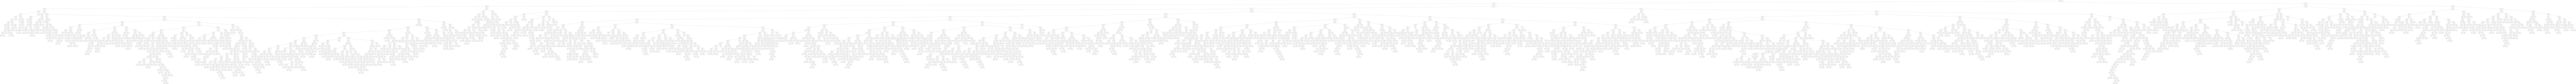

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [13]:
graph.write_pdf("D:/cayQuyetDinh.pdf")

graph.write_png("D:/cayQuyetDinh.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.20703 to fit



True

In [14]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5632233176168024
[[503 177 165]
 [146 679 180]
 [180 171 132]]
              precision    recall  f1-score   support

        High       0.61      0.60      0.60       845
         Low       0.66      0.68      0.67      1005
      Medium       0.28      0.27      0.28       483

    accuracy                           0.56      2333
   macro avg       0.51      0.51      0.51      2333
weighted avg       0.56      0.56      0.56      2333



NameError: name 'model' is not defined

<Figure size 2000x1000 with 0 Axes>